# Decision Tree

In [28]:
from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = load_iris()
X = data.data
y = data.target
print(X.shape, y.shape)

(150, 4) (150,)


In [30]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [31]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

In [32]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [35]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

# Scaling

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

In [37]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model

In [38]:
model = DecisionTreeClassifier(max_depth=7, random_state=57)

In [39]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=57)

In [40]:
y_pred = model.predict(X_test)

In [41]:
model.score(X_test, y_pred)

1.0

In [42]:
report = classification_report(y_test, y_pred)

In [43]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



[Text(167.4, 199.32, 'X[2] <= 0.254\ngini = 0.664\nsamples = 105\nvalue = [33, 39, 33]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 0.688\ngini = 0.497\nsamples = 72\nvalue = [0, 39, 33]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 0.693\ngini = 0.172\nsamples = 42\nvalue = [0, 38, 4]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 0.646\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 0.604\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 0.779\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(15

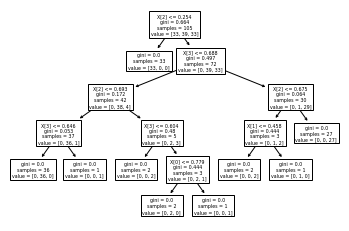

In [44]:
plot_tree(model)